In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm,tqdm_notebook
import matplotlib.pyplot as plt

# Import the data

In [52]:
offline_test = pd.read_csv("ccf_offline_stage1_test_revised.csv", dtype=str, parse_dates=['Date_received'])
offline_train = pd.read_csv("ccf_offline_stage1_train.csv", dtype=str, parse_dates=['Date_received', 'Date'])
online_train = pd.read_csv("ccf_online_stage1_train.csv", dtype=str, parse_dates=['Date_received', 'Date'])

In [3]:
offline_test[:200]

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received
0,4129537,450,9983,30:5,1.0,2016-07-12
1,6949378,1300,3429,30:5,NaN,2016-07-06
2,2166529,7113,6928,200:20,5.0,2016-07-27
3,2166529,7113,1808,100:10,5.0,2016-07-27
4,6172162,7605,6500,30:1,2.0,2016-07-08
5,4005121,450,9983,30:5,0.0,2016-07-06
6,4347394,450,9983,30:5,0.0,2016-07-16
7,3094273,760,13602,30:5,1.0,2016-07-27
8,5139970,450,9983,30:5,10.0,2016-07-29
9,3237121,760,13602,30:5,1.0,2016-07-03


In [4]:
offline_train[:200]

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaT,2016-02-17
1,1439408,4663,11002.0,150:20,1.0,2016-05-28,NaT
2,1439408,2632,8591.0,20:1,0.0,2016-02-17,NaT
3,1439408,2632,1078.0,20:1,0.0,2016-03-19,NaT
4,1439408,2632,8591.0,20:1,0.0,2016-06-13,NaT
5,1439408,2632,NaN,NaN,0.0,NaT,2016-05-16
6,1439408,2632,8591.0,20:1,0.0,2016-05-16,2016-06-13
7,1832624,3381,7610.0,200:20,0.0,2016-04-29,NaT
8,2029232,3381,11951.0,200:20,1.0,2016-01-29,NaT
9,2029232,450,1532.0,30:5,0.0,2016-05-30,NaT


In [5]:
online_train[:200]

,User_id,Merchant_id,Action,Coupon_id,Discount_rate,Date_received,Date
0,13740231,18907,2,100017492,500:50,2016-05-13,NaT
1,13740231,34805,1,NaN,NaN,NaT,2016-03-21
2,14336199,18907,0,NaN,NaN,NaT,2016-06-18
3,14336199,18907,0,NaN,NaN,NaT,2016-06-18
4,14336199,18907,0,NaN,NaN,NaT,2016-06-18
5,14336199,18907,0,NaN,NaN,NaT,2016-06-18
6,14336199,18907,0,NaN,NaN,NaT,2016-06-18
7,14336199,18907,0,NaN,NaN,NaT,2016-06-18
8,14336199,18907,0,NaN,NaN,NaT,2016-06-18
9,14336199,18907,0,NaN,NaN,NaT,2016-06-18


**Explore the data sets**

In the offline dataset, "Distance" is a feature that doesn't appear in the online dataset, while "Action" appears in the online dataset but not in the offline dataset.

In [6]:
print(offline_train.columns)
print(online_train.columns)

Index(['User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate', 'Distance',
       'Date_received', 'Date'],
      dtype='object')
Index(['User_id', 'Merchant_id', 'Action', 'Coupon_id', 'Discount_rate',
       'Date_received', 'Date'],
      dtype='object')


In "online_train" there are much more data, not using these data may reduce the performance of our model

In [7]:
print(len(offline_train))
print(len(online_train))

1754884
11429826


In [8]:
print(len(offline_train.User_id.unique()))
print(len(offline_train.Merchant_id.unique()))
print(len(offline_train.Coupon_id.unique()))
print(len(online_train.User_id.unique()))
print(len(online_train.Merchant_id.unique()))

539438
8415
9739
762858
7999


In [9]:
set(offline_train.Merchant_id.unique()).intersection(set(online_train.Merchant_id.unique()))

set()

In [10]:
set(offline_train.Coupon_id.unique()).intersection(set(online_train.Coupon_id.unique()))

set()

None of the Merchant_id in "offline" appears in "online", neither does Coupon_id

# Data engineering

**Distance**

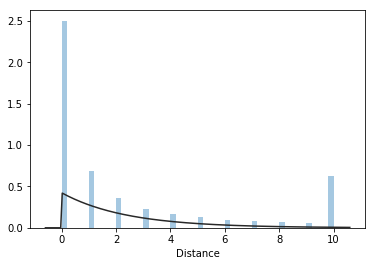

In [13]:
from scipy import stats
import seaborn as sns

distance = offline_train['Distance'].dropna(how='any')
sns.distplot(distance, kde=False, fit=stats.expon)

The distances can be fit by an exponetial distibution, as the geometric distribution is a discretised version of the exponential distribution,  we suppose the distance follows a geometrique distribution, we can thus generate the distance by take the integer part of a random variable following a exponential distribution

In [63]:
def tf_distance(df):
    
    res_df = df.copy()
    mean_distance = res_df['Distance'].mean()
    
    def fill_nan_distance(row):
        return row.fillna({'Distance': np.random.exponential(mean_distance)})
    
    res_df = res_df.apply(fill_nan_distance, axis=1)
    res_df.Distance = res_df.Distance.astype('int')
    return res_df

In [64]:
tf_distance(offline_train.head())

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0,NaN,2016-02-17 00:00:00
1,1439408,4663,11002,150:20,1,2016-05-28 00:00:00,NaN
2,1439408,2632,8591,20:1,0,2016-02-17 00:00:00,NaN
3,1439408,2632,1078,20:1,0,2016-03-19 00:00:00,NaN
4,1439408,2632,8591,20:1,0,2016-06-13 00:00:00,NaN


**Discount rate**

In [58]:
def transform_discount_rate(row):
    if pd.isna(row['is_per_full_purchase']):
        return pd.Series([None, None, None])
    if row['is_per_full_purchase']:
        return pd.Series([row['Discount_rate'].split(":")[0], row['Discount_rate'].split(":")[1], 0])
    else:
        return pd.Series([0, 0, row['Discount_rate']])
    
def tf_discount_rate(df):
    res_df = df.copy()
    res_df['is_per_full_purchase'] = res_df['Discount_rate'].str.contains(":")
    res_df[['满', '减', '折扣']] = res_df.apply(transform_discount_rate, axis=1)
    return res_df

In [59]:
tf_discount_rate(offline_train.head())

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date,is_per_full_purchase,满,减,折扣
0,1439408,2632,NaN,NaN,0,NaT,2016-02-17,NaN,None,None,NaN
1,1439408,4663,11002,150:20,1,2016-05-28,NaT,True,150,20,0.0
2,1439408,2632,8591,20:1,0,2016-02-17,NaT,True,20,1,0.0
3,1439408,2632,1078,20:1,0,2016-03-19,NaT,True,20,1,0.0
4,1439408,2632,8591,20:1,0,2016-06-13,NaT,True,20,1,0.0


**Offline feature generalisation**

User offline features

In [87]:
def tf_offline_user(df):
    my_df = df.copy()
    tmp = (my_df['Date'] - my_df['Date_received']).apply(lambda x: x.days)
    
    user_ids = my_df['User_id'].unique()
    offline_train_user = pd.DataFrame(columns=['User_id'], data=user_ids)
    offline_train_user['N_buy_in_15'] = 0
    offline_train_user['N_buy_out_15'] = 0
    offline_train_user['N_buy_without_coupon'] = 0
    offline_train_user['N_receive'] = 0
    
    offline_train_user.set_index('User_id', inplace=True)
    for _, i in tqdm(my_df.iterrows(), total=len(my_df)):
        index = i['User_id']
        if not pd.isnull(i['Date_received']):
            offline_train_user.loc[index, 'N_receive'] += 1
        if not pd.isnull(i['Date']):
            if tmp[_] <= 15:
                offline_train_user.loc[index, 'N_buy_in_15'] += 1
            elif tmp[_] > 15:
                offline_train_user.loc[index, 'N_buy_out_15'] += 1
            else:
                offline_train_user.loc[index, 'N_buy_without_coupon'] += 1
    # offline_train_user = offline_train_user.reset_index()
    
    return(offline_train_user)

In [112]:
offline_features_user = tf_offline_user(offline_train.head())
offline_features_user


100%|██████████| 5/5 [00:00<00:00, 642.35it/s]

,N_buy_in_15,N_buy_out_15,N_buy_without_coupon,N_receive
User_id,,,,
1439408,0,0,1,4


Merchant offline features

In [89]:
def tf_offline_merchant(df):
    my_df = df.copy()
    tmp = (my_df['Date'] - my_df['Date_received']).apply(lambda x: x.days)
    
    merchant_ids = my_df['Merchant_id'].unique()
    offline_train_merchant = pd.DataFrame(columns=['Merchant_id'], data=merchant_ids)
    offline_train_merchant['N_buy_in_15'] = 0
    offline_train_merchant['N_buy_out_15'] = 0
    offline_train_merchant['N_buy_without_coupon'] = 0
    offline_train_merchant['N_receive'] = 0

    offline_train_merchant.set_index('Merchant_id', inplace=True)
    for _, i in tqdm(my_df.iterrows(), total=len(my_df)):
        index = i['Merchant_id']
        if not pd.isnull(i['Date_received']):
            offline_train_merchant.loc[index, 'N_receive'] += 1
        if not pd.isnull(i['Date']):
            if tmp[_] <= 15:
                offline_train_merchant.loc[index, 'N_buy_in_15'] += 1
            elif tmp[_] > 15:
                offline_train_merchant.loc[index, 'N_buy_out_15'] += 1
            else:
                offline_train_merchant.loc[index, 'N_buy_without_coupon'] += 1
    # offline_train_merchant = offline_train_merchant.reset_index()
    
    return(offline_train_merchant)

In [122]:
offline_features_merchant = tf_offline_merchant(offline_train.head())
print(offline_features_merchant)


100%|██████████| 5/5 [00:00<00:00, 502.97it/s]

             N_buy_in_15  N_buy_out_15  N_buy_without_coupon  N_receive
Merchant_id                                                            
2632                   0             0                     1          3
4663                   0             0                     0          1


Discount rate offline features

In [91]:
def tf_offline_dsc_rate(df):
    my_df = df.copy()
    tmp = (my_df['Date'] - my_df['Date_received']).apply(lambda x: x.days)
    
    dsc_ids = my_df['Discount_rate'].unique()
    offline_train_dsc = pd.DataFrame(columns=['Discount_rate'], data=dsc_ids)
    offline_train_dsc['N_buy_in_15'] = 0
    offline_train_dsc['N_buy_out_15'] = 0
    offline_train_dsc['N_buy_without_coupon'] = 0
    offline_train_dsc['N_receive'] = 0

    offline_train_dsc.set_index('Discount_rate', inplace=True)
    for _, i in tqdm(my_df.iterrows(), total=len(my_df)):
        index = i['Discount_rate']
        if not pd.isnull(i['Date_received']):
            offline_train_dsc.loc[index, 'N_receive'] += 1
        if not pd.isnull(i['Date']):
            if tmp[_] <= 15:
                offline_train_dsc.loc[index, 'N_buy_in_15'] += 1
            elif tmp[_] > 15:
                offline_train_dsc.loc[index, 'N_buy_out_15'] += 1
            else:
                offline_train_dsc.loc[index, 'N_buy_without_coupon'] += 1
    # offline_train_dsc = offline_train_dsc.reset_index()
    
    return (offline_train_dsc)

In [123]:
offline_features_dsc_rate = tf_offline_dsc_rate(offline_train.head())
print(offline_features_dsc_rate)


100%|██████████| 5/5 [00:00<00:00, 322.71it/s]

               N_buy_in_15  N_buy_out_15  N_buy_without_coupon  N_receive
Discount_rate                                                            
NaN                      0             0                     1          0
150:20                   0             0                     0          1
20:1                     0             0                     0          3


**Online features generalisation**

User online features

In [93]:
def tf_online_user(df):
    my_df = df.copy()
    
    tmp = (my_df['Date']-my_df['Date_received']).apply(lambda x:x.days)

    userIDs = my_df['User_id'].unique()
    res = pd.DataFrame(columns = ['User_id'], data=userIDs)
    res['get_coupon'] = 0
    res['click'] = 0
    res['buy'] = 0
    res['ps'] = 0
    res['ns'] = 0

    res.set_index('User_id', inplace=True)
    for _, i in tqdm_notebook(my_df.iterrows(), total=len(my_df)):
        index = i['User_id']
        if i['Action'] == '0':
            res.loc[index, 'click'] += 1
        elif i['Action'] == '2':
            res.loc[index, 'get_coupon'] += 1
        elif i['Action'] == '1':
            if pd.isnull(i['Coupon_id']):
                res.loc[index, 'buy'] += 1
            else:
                if tmp[_] <= 15:
                    res.loc[index, 'ps'] += 1
                elif tmp[_] > 15:
                    res.loc[index, 'ns'] += 1
    # res = res.reset_index()
    
    return(res)

In [124]:
online_features_user = tf_online_user(online_train.head())
print(online_features_user)

          get_coupon  click  buy  ps  ns
User_id                                 
13740231           1      0    1   0   0
14336199           0      3    0   0   0


Discount rate online features

In [95]:
def tf_online_dsc_rate(df):
    my_df = df.copy()
    
    tmp = (my_df['Date']-my_df['Date_received']).apply(lambda x:x.days)
    
    discountRates = my_df['Discount_rate'].unique()
    res = pd.DataFrame(columns = ['Discount_rate'], data=discountRates)
    res['get_coupon'] = 0
    res['ps'] = 0
    res['ns'] = 0

    res.set_index('Discount_rate', inplace=True)
    for _, i in tqdm_notebook(my_df.iterrows(), total=len(my_df)):

        if pd.isnull(i['Discount_rate']):
            continue
        index = i['Discount_rate']
        if i['Action'] == '0':
            continue
        elif i['Action'] == '2':
            res.loc[index, 'get_coupon'] += 1
        elif i['Action'] == '1':
            if pd.isnull(i['Coupon_id']):
                continue
            else:
                if tmp[_] <= 15:
                    res.loc[index, 'ps'] += 1
                elif tmp[_] > 15:
                    res.loc[index, 'ns'] += 1
    
    # res = res.reset_index()
    
    return(res)

In [125]:
online_features_dsc_rate = tf_online_dsc_rate(online_train.head())
print(online_features_dsc_rate)

               get_coupon  ps  ns
Discount_rate                    
500:50                  1   0   0
NaN                     0   0   0


# Data preparing

**Dataset splitting**

In [17]:
def sperate_offline(df):
    buy = df[pd.isnull(df['Coupon_id'])]
    received = df[(~pd.isnull(df['Coupon_id'])) & (pd.isnull(df['Date']))]
    ps = df[(~pd.isnull(df['Coupon_id'])) & (~pd.isnull(df['Date'])) \
                      & ((df['Date']-df['Date_received']).apply(lambda x:x.days) <= 15)]
    ns = df[(~pd.isnull(df['Coupon_id'])) & (~pd.isnull(df['Date'])) \
                      & ((df['Date']-df['Date_received']).apply(lambda x:x.days) > 15)]
    
    return buy, received, ps, ns

buy, received, ps, ns = sperate_offline(offline_train)

In [18]:
buy.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
0,1439408,2632,NaN,NaN,0.0,NaT,2016-02-17
5,1439408,2632,NaN,NaN,0.0,NaT,2016-05-16
11,2029232,6459,NaN,NaN,0.0,NaT,2016-06-26
12,2029232,6459,NaN,NaN,0.0,NaT,2016-05-19
14,196342,1579,NaN,NaN,1.0,NaT,2016-06-06


In [19]:
received.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
1,1439408,4663,11002.0,150:20,1.0,2016-05-28,NaT
2,1439408,2632,8591.0,20:1,0.0,2016-02-17,NaT
3,1439408,2632,1078.0,20:1,0.0,2016-03-19,NaT
4,1439408,2632,8591.0,20:1,0.0,2016-06-13,NaT
7,1832624,3381,7610.0,200:20,0.0,2016-04-29,NaT


In [20]:
ps.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
33,1113008,1361,11166.0,20:1,0.0,2016-05-15,2016-05-21
38,2881376,8390,7531.0,20:5,0.0,2016-03-21,2016-03-29
69,114747,6901,2366.0,30:5,0.0,2016-05-23,2016-06-05
76,114747,5341,111.0,30:5,0.0,2016-02-07,2016-02-18
77,114747,5341,7751.0,50:10,0.0,2016-01-27,2016-01-28


In [21]:
ns.head()

,User_id,Merchant_id,Coupon_id,Discount_rate,Distance,Date_received,Date
6,1439408,2632,8591.0,20:1,0.0,2016-05-16,2016-06-13
75,114747,5341,111.0,30:5,0.0,2016-01-27,2016-02-21
100,114747,3381,9776.0,10:5,0.0,2016-01-29,2016-02-21
368,1910192,8244,5756.0,30:5,10.0,2016-05-28,2016-06-26
426,222550,3381,9776.0,10:5,0.0,2016-01-29,2016-02-14


Get offline&online features

In [134]:
def get_features_by_row(row):
    res = []
    try:
        feature_offline_user = offline_features_user.loc[row['User_id']][:].values
        res.append(1)
        res.extend(feature_offline_user)
        # print(res)
    except(KeyError):
        res.append(0)
        res.extend([0,0,0,0])
        # print(res)
        
    try:
        feature_offline_merchant = offline_features_merchant.loc[row['User_id']][:].values
        res.append(1)
        res.extend(feature_offline_merchant)
        # print(res)
    except(KeyError):
        res.append(0)
        res.extend([0,0,0,0])
        # print(res)
        
    try:
        feature_offline_dsc = offline_features_dsc_rate.loc[row['User_id']][:].values
        res.append(1)
        res.extend(feature_offline_dsc)
        # print(res)
    except(KeyError):
        res.append(0)
        res.extend([0,0,0,0])
        # print(res)
        
    try:
        feature_online_user = online_features_user.loc[row['User_id']][:].values
        res.append(1)
        res.extend(feature_online_user)
        # print(res)
    except(KeyError):
        res.append(0)
        res.extend([0,0,0,0,0])
        # print(res)
        
    try:
        feature_online_dsc = online_features_dsc_rate.loc[row['User_id']][:].values
        res.append(1)
        res.extend(feature_online_dsc)
        # print(res)
    except(KeyError):
        res.append(0)
        res.extend([0,0,0])
        
    return(pd.Series(res))

In [135]:
get_features_by_row(offline_train.iloc[1][:])

0     1
1     0
2     0
3     1
4     4
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64